In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave

In [3]:
from numpy.fft import fft,ifft,fft2,ifft2,fftshift,ifftshift

def fourier2(im):
    return fftshift(fft2(im))

def ifourier2(f):
    return ifft2(ifftshift(f)).real

def fourier(s):
    return fftshift(fft(s))

def ifourier(f):
    return ifft(ifftshift(f)).real

def ampl(f):
    return np.sqrt(f.real**2 + f.imag**2)

def phase(f):
    return np.arctan2(f.imag, f.real)

<IPython.core.display.Javascript object>


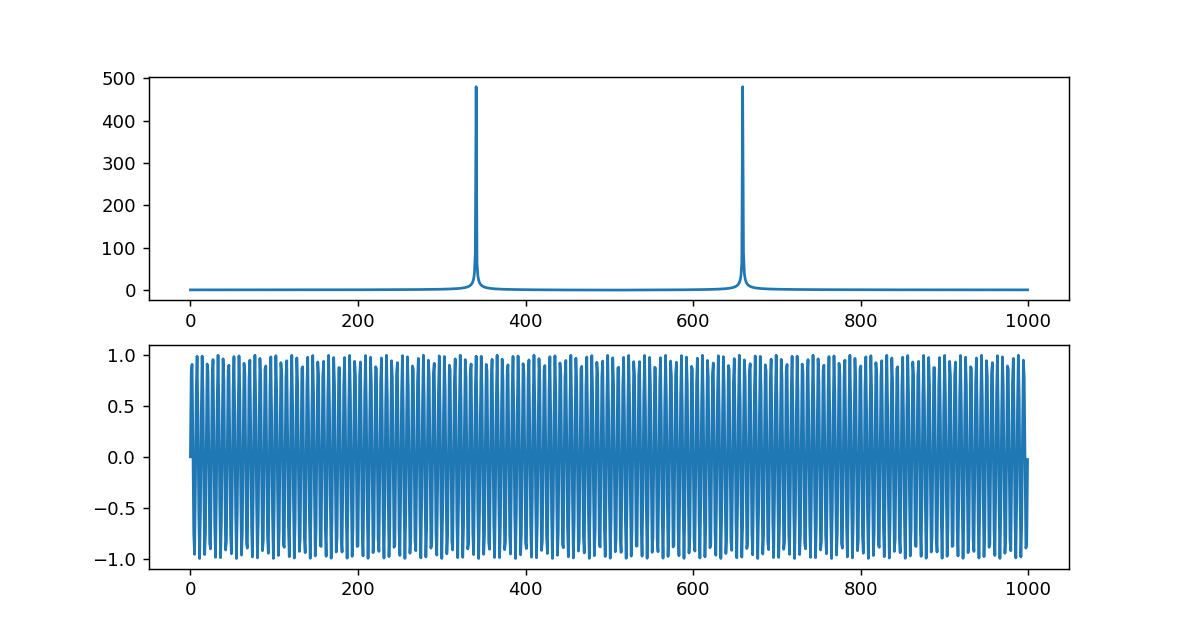

In [5]:
t = np.arange(1000)
s = np.sin(t)
f = fourier(s)

plt.figure()
plt.subplot(2,1,1)
plt.plot(ampl(f))
plt.subplot(2,1,2)
plt.plot(s)
plt.show()

<IPython.core.display.Javascript object>


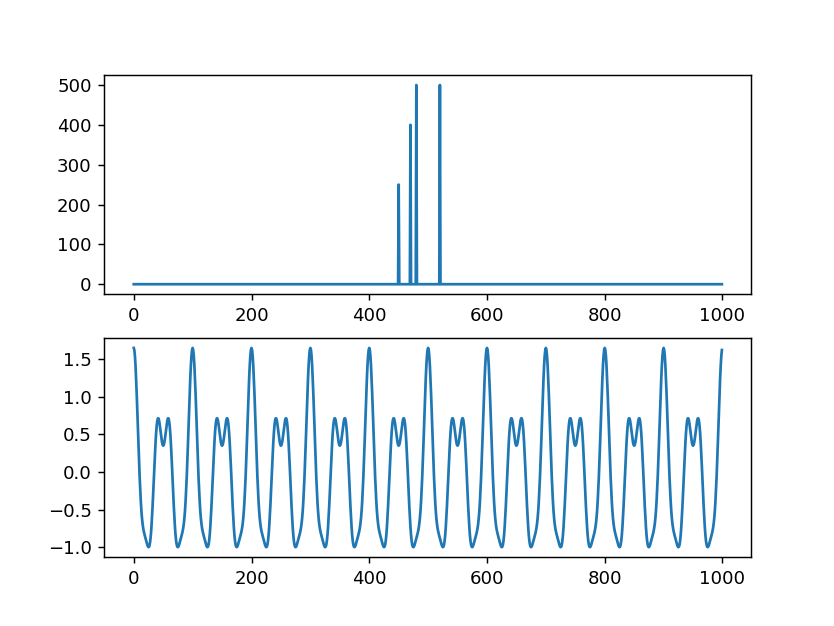

In [9]:
f = np.zeros((1000,))
f[480] = 500.
f[520] = 500.
f[470] = 400.
f[450] = 250.
s = ifourier(f)

plt.figure()
plt.subplot(2,1,1)
plt.plot(ampl(f))
plt.subplot(2,1,2)
plt.plot(s)
plt.show()

<IPython.core.display.Javascript object>


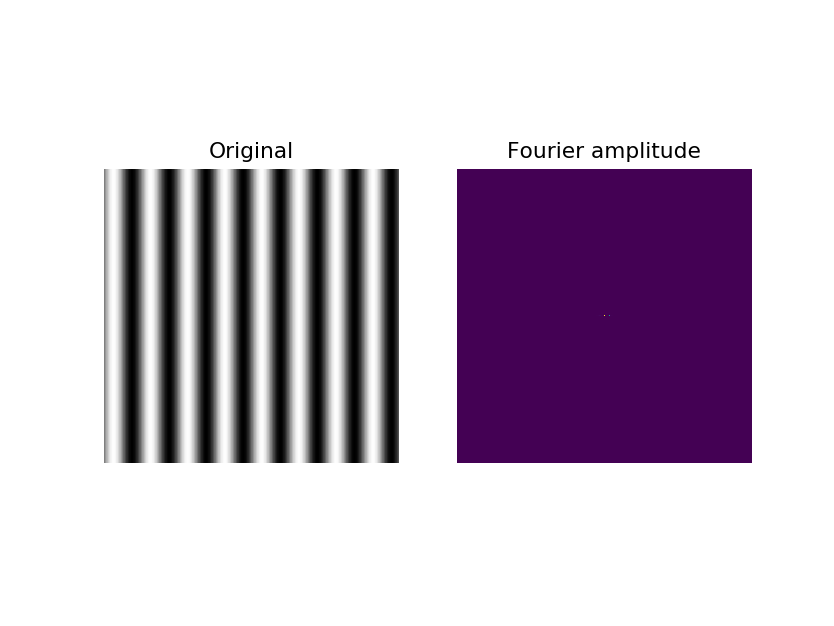

<IPython.core.display.Javascript object>


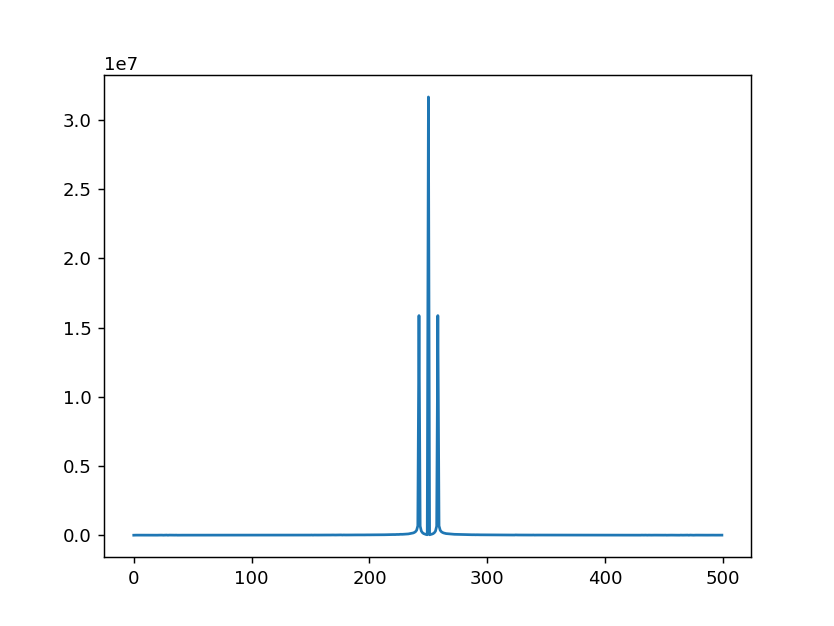

In [10]:
fake_im = np.zeros((500,500)).astype('uint8')
for i in range(fake_im.shape[1]):
    fake_im[:,i] = np.sin(i/10.)*127+127
        
f = fourier2(fake_im)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(fake_im, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='none')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ampl(f), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.show()
plt.figure()
plt.plot(ampl(f)[250,:])
plt.show()

<IPython.core.display.Javascript object>


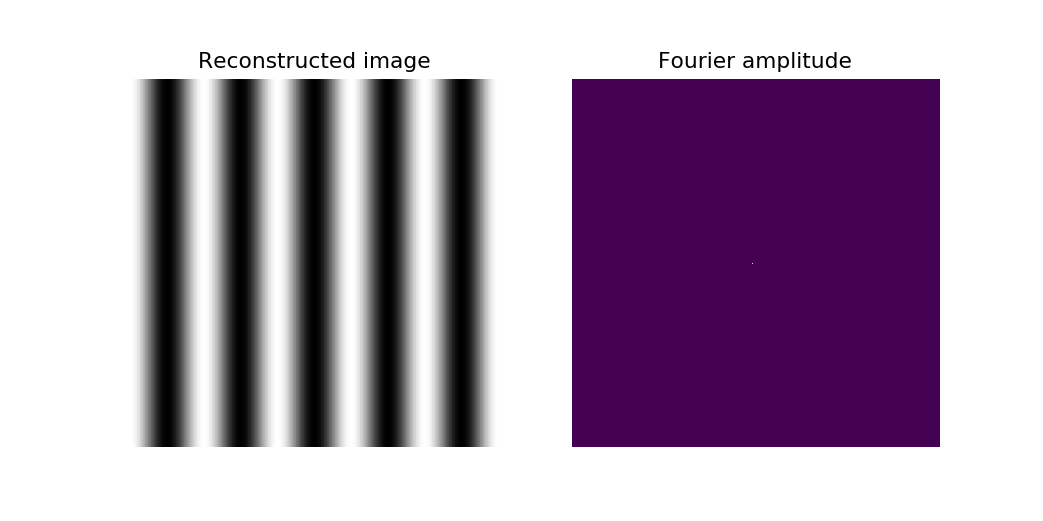

In [12]:
fake_fourier = np.zeros((500,500)) + 0j # cast to complex by adding a complex number
fake_fourier[250,255] = 1
fake_fourier[250,245] = 1

im = ifourier2(fake_fourier).real

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray, interpolation='none')
plt.title('Reconstructed image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ampl(fake_fourier), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


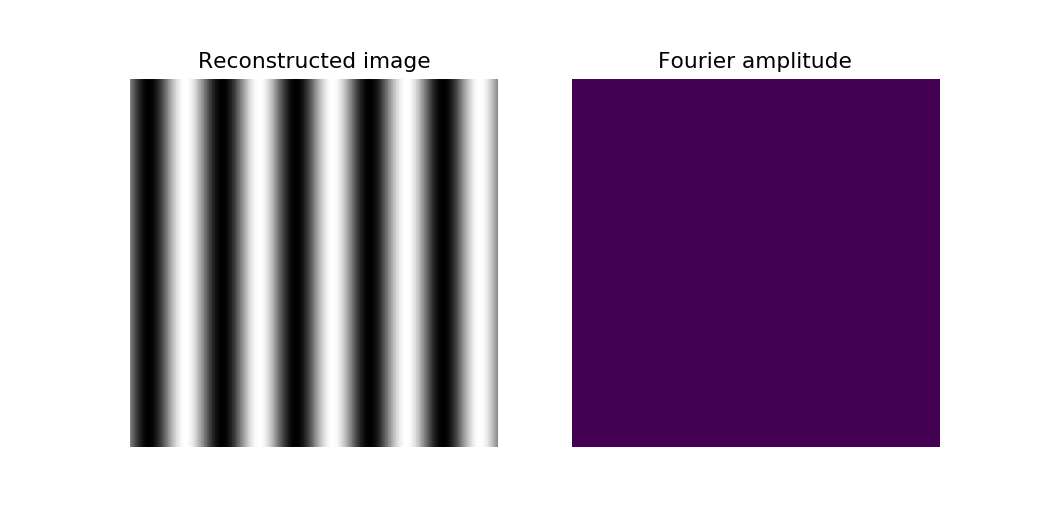

In [21]:
fake_fourier = np.zeros((500,500)) + 0j # cast to complex by adding a complex number
fake_fourier[250,255] = 1j
#fake_fourier[255,250] = 4.
#fake_fourier[260,260] = 3.
#fake_fourier[252,249] = 6.

im = ifourier2(fake_fourier).real

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray, interpolation='none')
plt.title('Reconstructed image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ampl(fake_fourier), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


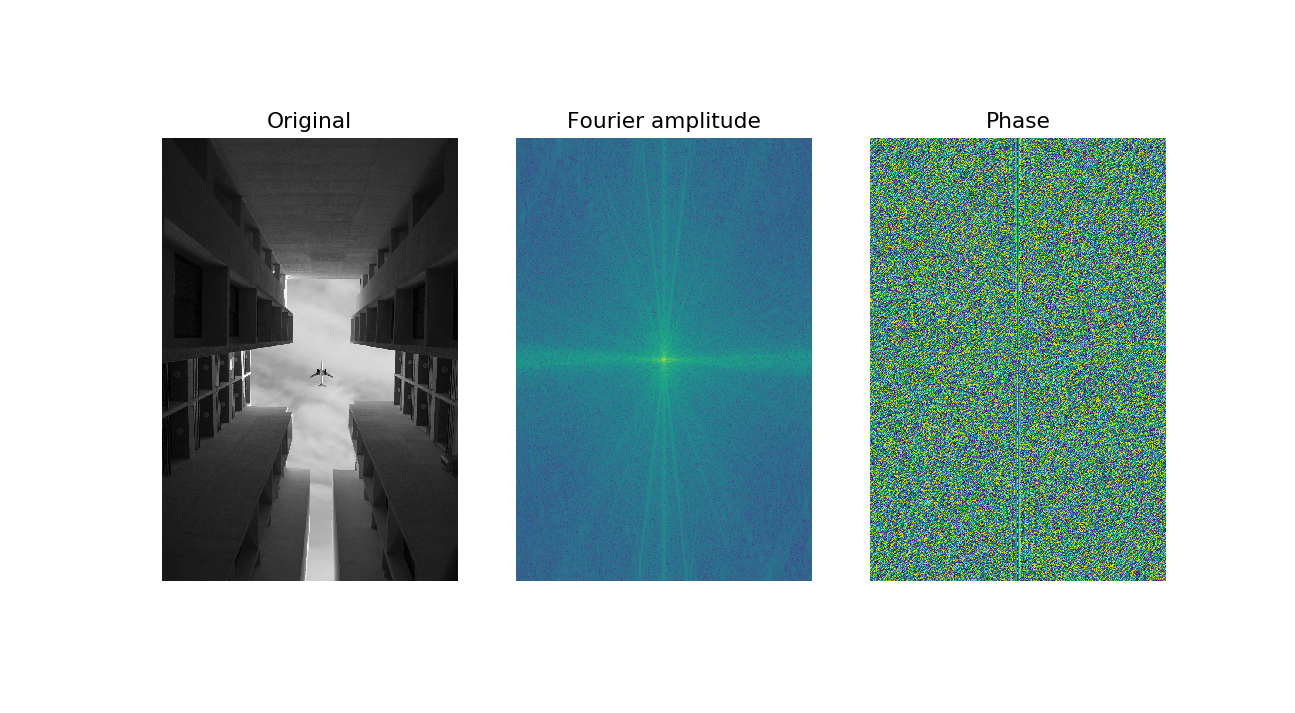

In [17]:
im = imread('airplane.jpg')

f = fourier2(im)
a = ampl(f)
p = phase(f)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='none')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f)), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(p, interpolation='none', cmap='viridis')
plt.title('Phase')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


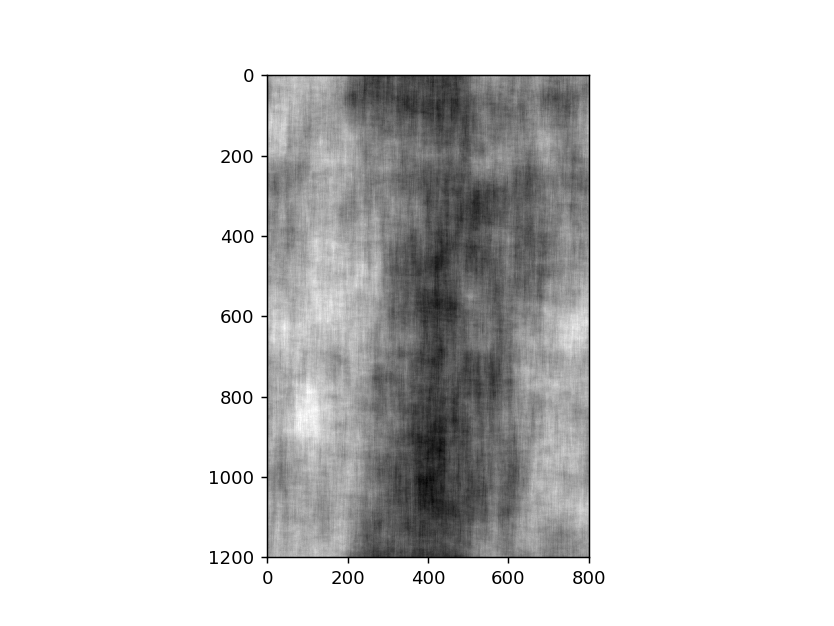

In [25]:
def reconstruct(ampl,phase):
    f = ampl*np.e**(1j*phase)
    return ifourier2(f)

r = reconstruct(a,p+np.random.random((p.shape))*2*np.pi)
plt.figure()
plt.imshow(r, cmap=plt.cm.gray, interpolation='none')
plt.show()